In [99]:
import os
import numpy as np
from matplotlib import pyplot as plt
import math
import cv2

In [100]:
def Bresenham2D(point1, point2):
    x1, y1, x2, y2 = point1[0], point1[1], point2[0], point2[1]
    ListOfPoints = []
    ListOfPoints.append([x1, y1])
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    xs = 1 if  (x2 > x1) else -1
    ys = 1 if (y2 > y1) else -1

    if (dx >= dy):
        p = 2 * dy - dx
        while (x1 != x2):
            x1 += xs
            if (p >= 0):
                y1 += ys
                p -= 2 * dx
            p += 2 * dy
            ListOfPoints.append([x1, y1])
    else:
        p = 2 * dx - dy
        while (y1 != y2):
            y1 += ys
            if (p >= 0):
                x1 += xs
                p -= 2 * dy
            p += 2 * dx
            ListOfPoints.append([x1, y1])
    return ListOfPoints


def Bresenham3D(point1, point2):
    x1, y1, z1, x2, y2, z2 = point1[0], point1[1], point1[2], point2[0], point2[1], point2[2]
    ListOfPoints = []
    ListOfPoints.append([x1, y1, z1])
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    dz = abs(z2 - z1)
    xs = 1 if(x2 > x1) else -1
    ys = 1 if (y2 > y1) else -1
    zs = 1 if (z2 > z1) else -1


    # Driving axis is X-axis"
    if (dx >= dy and dx >= dz):
        p1 = 2 * dy - dx
        p2 = 2 * dz - dx
        if xs > 0:
            while (x1 < x2):
                x1 += xs
                if (p1 >= 0):
                    y1 += ys
                    p1 -= 2 * dx
                if (p2 >= 0):
                    z1 += zs
                    p2 -= 2 * dx
                p1 += 2 * dy
                p2 += 2 * dz
                ListOfPoints.append([x1, y1, z1])
        else:
            while (x1 > x2):
                x1 += xs
                if (p1 >= 0):
                    y1 += ys
                    p1 -= 2 * dx
                if (p2 >= 0):
                    z1 += zs
                    p2 -= 2 * dx
                p1 += 2 * dy
                p2 += 2 * dz
                ListOfPoints.append([x1, y1, z1])

    # Driving axis is Y-axis"
    elif (dy >= dx and dy >= dz):
        p1 = 2 * dx - dy
        p2 = 2 * dz - dy
        if ys > 0:
            while (y1 < y2):
                y1 += ys
                if (p1 >= 0):
                    x1 += xs
                    p1 -= 2 * dy
                if (p2 >= 0):
                    z1 += zs
                    p2 -= 2 * dy
                p1 += 2 * dx
                p2 += 2 * dz
                ListOfPoints.append([x1, y1, z1])
        else:
            while (y1 > y2):
                y1 += ys
                if (p1 >= 0):
                    x1 += xs
                    p1 -= 2 * dy
                if (p2 >= 0):
                    z1 += zs
                    p2 -= 2 * dy
                p1 += 2 * dx
                p2 += 2 * dz
                ListOfPoints.append([x1, y1, z1])

    # Driving axis is Z-axis"
    else:
        p1 = 2 * dy - dz
        p2 = 2 * dx - dz
        if zs > 0:
            while (z1 < z2):
                z1 += zs
                if (p1 >= 0):
                    y1 += ys
                    p1 -= 2 * dz
                if (p2 >= 0):
                    x1 += xs
                    p2 -= 2 * dz
                p1 += 2 * dy
                p2 += 2 * dx
                ListOfPoints.append([x1, y1, z1])
        else:
            while (z1 > z2):
                z1 += zs
                if (p1 >= 0):
                    y1 += ys
                    p1 -= 2 * dz
                if (p2 >= 0):
                    x1 += xs
                    p2 -= 2 * dz
                p1 += 2 * dy
                p2 += 2 * dx
                ListOfPoints.append([x1, y1, z1])
    return ListOfPoints

def euclidean_distance_n(point1, points):
    distances = np.zeros(len(points))
    for i, point2 in enumerate(points):
        distances[i] = math.sqrt(sum([(a - b) ** 2 for a, b in zip(point1, point2)]))
    return distances

In [101]:
# file_names = os.listdir("SkyScale_webpage/SkyScale_results")
# print(file_names)
# fig, axes = plt.subplots(4,3, figsize = (12,16))
# k = 0
# for i in range(1,5):
#     for j, tx_pos in enumerate(((-35,-40,5),(-55,45,5),(65,-20,5))):
#         axes[i-1, j].imshow(np.load("SkyScale_webpage/SkyScale_results/"+file_names[k]))
#         k+=1  

# Below cell plots all the terrains

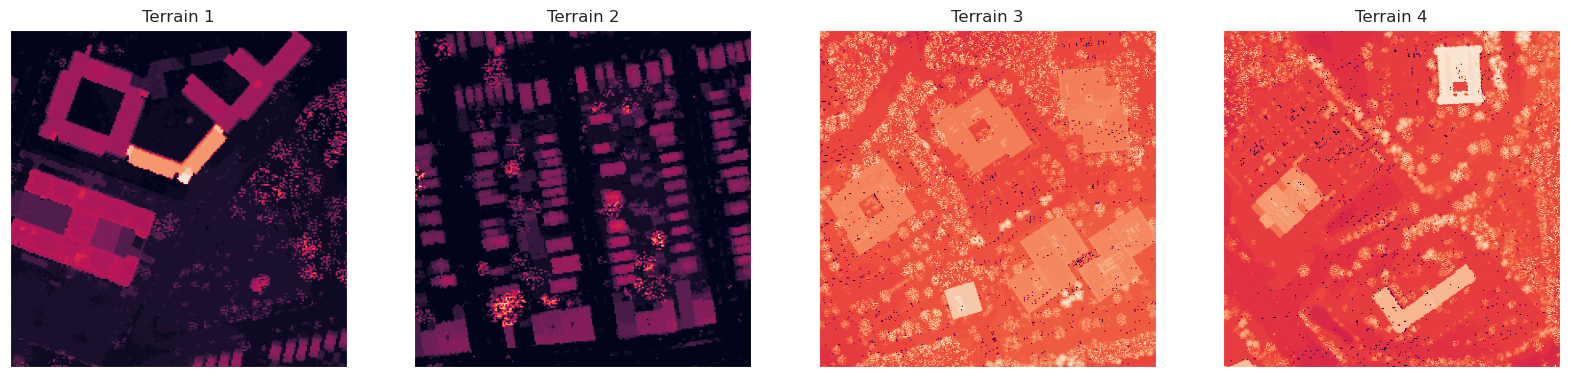

In [102]:
fig, axes = plt.subplots(1,4, figsize = (20,6))
all_terrain = []
files  = ["terrain_1", 'terrain_2',"terrain_4", "terrain_5"]
for i, file in enumerate(files):
    terrain_2d = np.load(f"{file}.npy")
    #print(terrain_2d.shape)
    axes[i].imshow(terrain_2d)
    axes[i].set_title( f"Terrain {i+1}")
    axes[i].tick_params(axis='both', labelsize=14)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].grid(False)
    all_terrain.append(terrain_2d)

# Set terrain_no parameter below

In [103]:
# select a terrain (0,1,2,3)
terrain_no = 1
terrain = all_terrain[terrain_no - 1]
terr_shape = terrain.shape
ausers_set = np.array([[[50,200],[55,105],[40,170]], [[60,200],[200,150],[125,105]],[[100,250],[250,100],[200,200]], [[20,210],[260,40],[200,300]]])
users = ausers_set[terrain_no - 1]

# One row corresponds to three different REMs for each terrain above

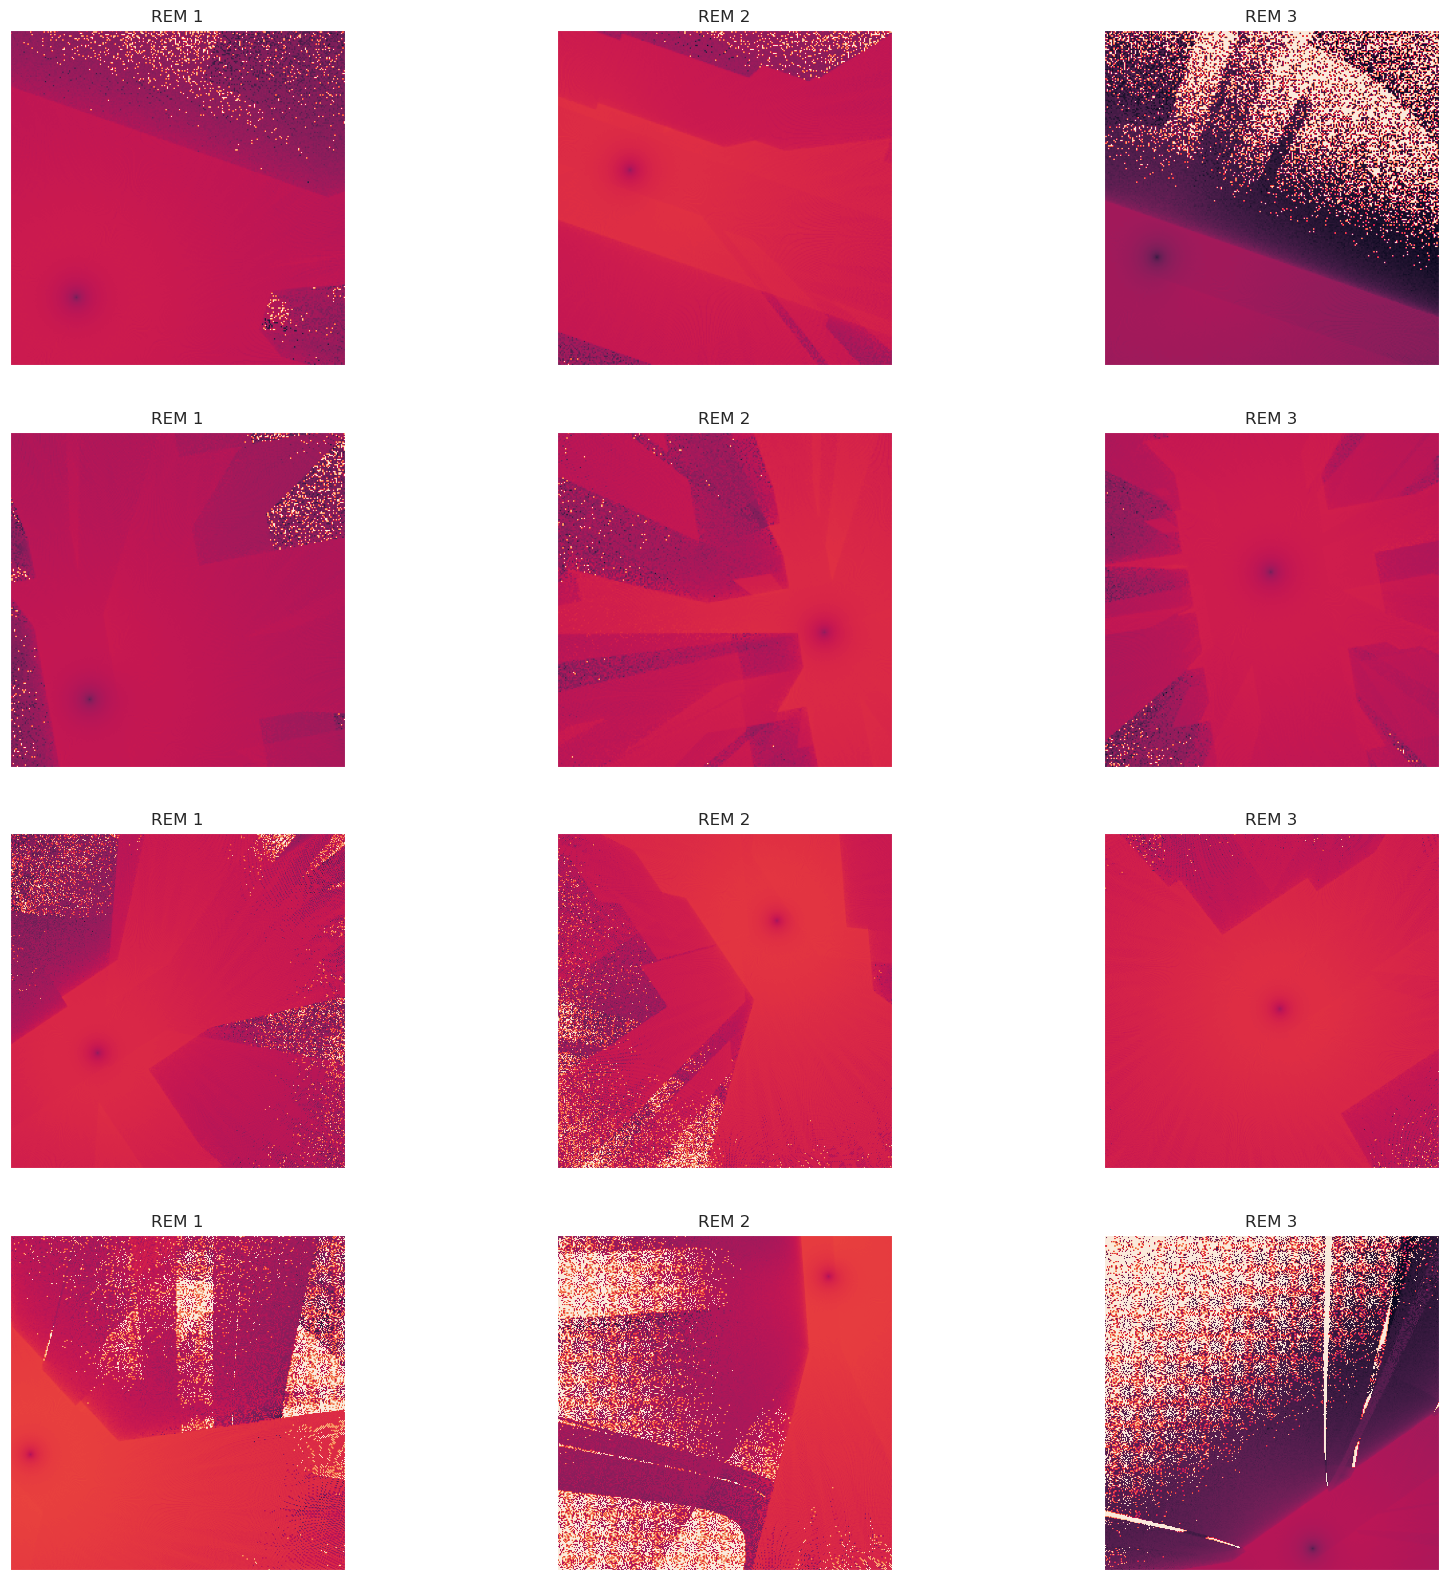

In [104]:
fig, axes = plt.subplots(4,3, figsize = (20,20))
all_rem = []
all_rem.append([])
for i in range(4):
    all_rem.append([])
    for j in range(3):
        terrain_2d = np.load(f"REMS_{i+1}_{j}.npy")
        cmap = axes[i, j].imshow(terrain_2d)
        axes[i, j].set_title( f"REM {j+1}")
        axes[i, j].tick_params(axis='both', labelsize=14)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        all_rem[i].append(terrain_2d)

# Below  cell creates the path and save saves in a vector called path_details which is a list of the form
 - [distance to all the users from the uav point,  path loss vector]

In [105]:
# Creating te path.....
path_connecting = ((20,15),(125,45),(155,152),(120,188),(54,162), (60,52)) # add points here to generate a path of your own
prev = path_connecting[0]
path = [(prev[0], prev[1], 45)]

for curr in path_connecting[1:]:
    for point in Bresenham2D(prev, curr)[1:]:
        path.append((point[0], point[1], 45))        
    prev = curr

rem = all_rem[terrain_no - 1]
path_details = []

#REm and terrain are not of same size need to be in same size
temp_path = np.array(path)
for point in path:
    distances = euclidean_distance_n(point, users)
    path_details.append([tuple(distances), [0 - rem[0][point[0], point[1]], 0 - rem[1][point[0], point[1]], 0 - rem[2][point[0], point[1]]]])
        

[]

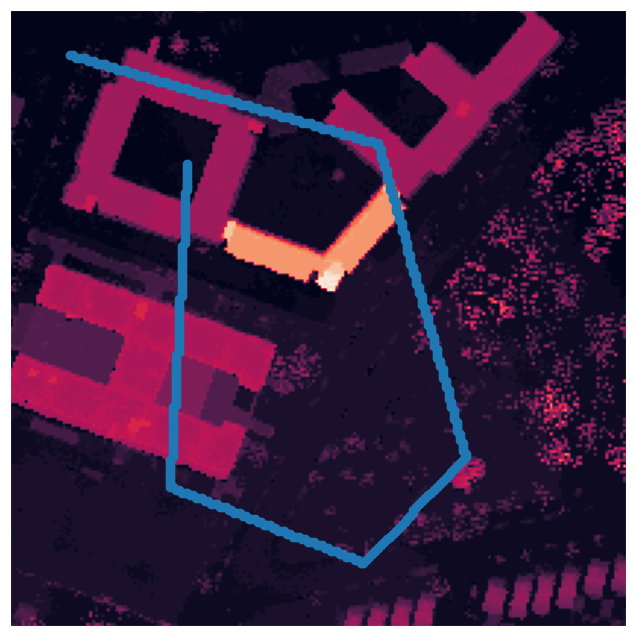

In [106]:
fig, ax = plt.subplots(figsize = (8,8))
temp_path = np.array(path)
temp_terr = np.array(terrain)
temp_terr = cv2.resize(temp_terr, all_rem[terrain_no - 1][0].shape)
ax.imshow(terrain)
ax.scatter(temp_path[:,0], temp_path[:,1])
ax.set_xticks([])
ax.set_yticks([])

# Note: Please, ignore where path loss is zero. It means the sionna did not generated any RSS for those points  

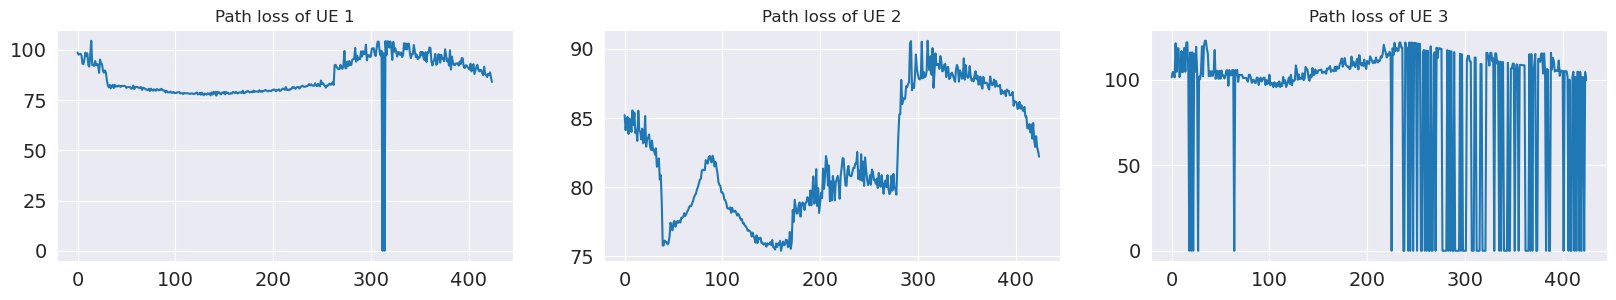

In [107]:
fig, axes = plt.subplots(1,3, figsize = (20,3))
all_path_loss = []
rem_set = all_rem[terrain_no- 1]
for i in range(3):
    rem = rem_set[i]
    path_loss = []
    for point in path_details:
        path_loss.append(point[1][i])
    axes[i].plot(path_loss)
    axes[i].set_title( f"Path loss of UE {i+1}")
    axes[i].tick_params(axis='both', labelsize=14)
    all_path_loss.append(path_loss)